# Assignment 3
**Due:**  March 19, before class.


## Problem 1

#### The Lorenz equations

One of the most celebrated sets of differential equations in physics is the [Lorenz equations](https://en.wikipedia.org/wiki/Lorenz_system):
$$ \frac{dx}{dt} = \sigma(y-x) $$ $$\frac{dy}{dt} = rx -y -xz$$ $$\frac{dz}{dt} = xy - bz$$ where $\sigma$, $r$ and $b$ are constants. The names of these constants may seem arbirtrary and odd but are always used in these equations -- _for historical reasons_.

Read about these equations, when and why they were introduced? What special behaviour do they show?

1. Implement an explicit solution to the Lorenz equations. Always use the range from $t = 0$ to $t = 50 $ with the intial condition $(x,y,z) = (1,1,1)$, and consider three cases for $\sigma$, $r$ and $b$ as shown in the code cell below.
2. Make a plot of $x, y$ and $z$ as a function of time for each case for a time step size of $h=0.01$ and $h=0.0001$ for each case. 
3. Create for the high-resolution cases a 3D line plot for each case using `from mpl_toolkits.mplot3d import Axes3D`.


In [49]:
#1 : 'benchmark'

if case == 1:
    r = 28.0
    s = 10.0
    b = 8.0 / 3.0
elif case == 2:
    r = 38.0
    s = 7.0
    b = 7.0 / 3.0
elif case == 3:
    r = 28.0
    s = 12.0
    b = 2.0 / 3.0

In [56]:
N=50
t=np.zeros(N)
x=np.zeros(N)
y=np.zeros(N)
z=np.zeros(N)
x[0]=1;y[0]=1;z[0]=1
tt=[]
xx=[]
yy=[]
zz=[]


for i in range(1,N):
        t[i]=t[i-1]+dt
        x[i]=x[i-1]+(s*(y[i-1]-x[i-1]))*dt
        y[i]= y[i-1]+(x[i-1]*(r-z[i-1])-y[i-1])*dt 
        z[i]= z[i-1]+(x[i-1]*y[i-1]-b*z[i-1])*dt
    
tt.append(t)
xx.append(x)
yy.append(y)
zz.append(z)

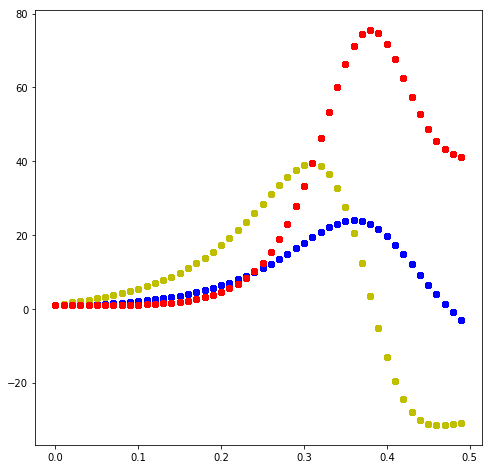

In [47]:
case==1
dt=0.01
ifig=2;close(ifig);figure(ifig,figsize=(8,8))
plot(array(tt),array(xx),'bo')
plot(array(tt),array(yy),'yo')
plot(array(tt),array(zz),"ro")

In [6]:
from mpl_toolkits.mplot3d import Axes3D

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


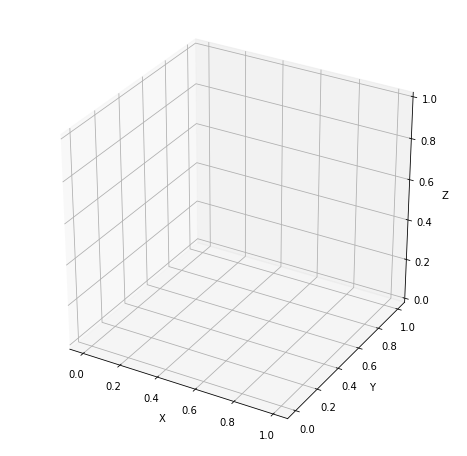

In [63]:
fig = figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot(xx, yy, zz, 'o')
ax.legend()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

Suggestion for further study (not graded): Setup the same solution with `scipy.integrate.odeint`. The solution can be found [Wikipedia's Lorenz system page](https://en.wikipedia.org/wiki/Lorenz_system). Students are encouraged to first try to figure out the solution yourelf. 

<IPython.core.display.Javascript object>


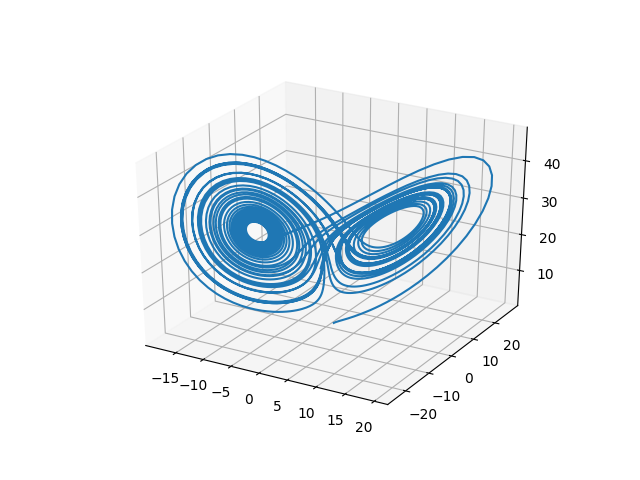

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
  x, y, z = state  # unpack the state vector
  return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # derivatives

state0 = [1.0, 1.0, 1.0]
t = np.arange(0.0, 40.0, 0.01)

states = odeint(f, state0, t)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(states[:,0], states[:,1], states[:,2])
plt.show()

## Problem 2
1. Construct a helix in 3D with the circular component in x, y and the stretch component in z direction. In each direction the values span the range $[-1,1]$ and the helix has 5 rotations. Make a plot in 3D using `from mpl_toolkits.mplot3d import Axes3D` with the view `ax.view_init(elev=45, azim=30)`.
2. Perform a shear transformation in the x direction that is proporitional to $1.5y$ of the helix and plot with view `ax.view_init(elev=80, azim=10)`.
3. Perform a rotation around the y-axis by $33\deg$.

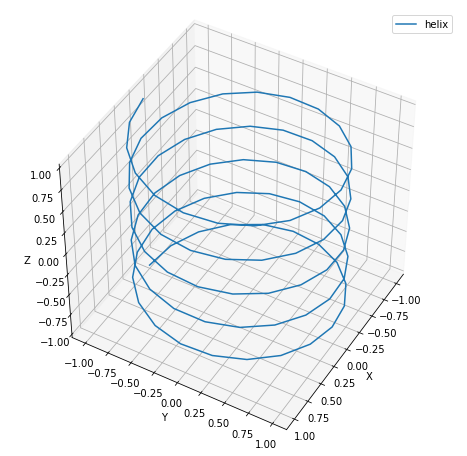

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
t=np.linspace(-5*np.pi,5*np.pi,100)
z=np.linspace(-1,1,100)
x=np.sin(t)
y=np.cos(t)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

this_label='helix'
ax.plot(x, y, z, '-',label=this_label)
ax.legend()
ax.view_init(elev=45, azim=30)
plt.show()


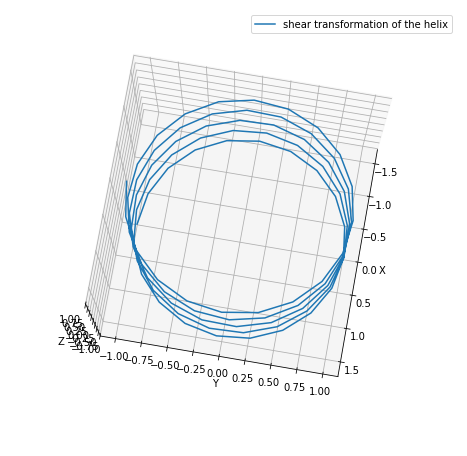

In [25]:
fig=plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
t=np.linspace(-5*np.pi,5*np.pi,100)
z=np.linspace(-1,1,100)
x=1.5*np.sin(t)
y=np.cos(t)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

this_label='shear transformation of the helix'
ax.plot(x, y, z, '-',label=this_label)
ax.legend()
ax.view_init(elev=80, azim=10)
plt.show()


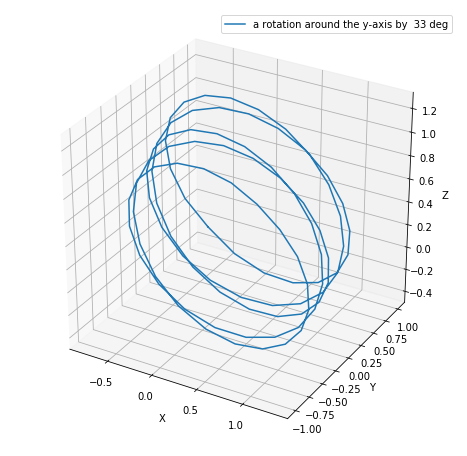

In [27]:
fig=plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

t=np.linspace(-5*np.pi,5*np.pi,100)
x=np.sin(t)
z=np.linspace(-1,1,100)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

rad=33*np.pi/180+np.arcsin(x/sqrt(x**2+z**2))

xt=np.sqrt(x**2+z**2)*np.sin(rad)
zt=np.sqrt(x**2+z**2)*np.cos(rad)

this_label='a rotation around the y-axis by  33 deg'
ax.plot(xt, y, zt, '-',label=this_label)
ax.legend()
plt.show()


## Problem 3: 

Given the equations for the voltage difference at each junction point for the circuit of resistors discussed in class (Part.III, unit 3):
* Simplify and sort the set of equations presented in class for the voltages.
* Setup coefficient matrix $A$ and RHS vector $\vec{u}$.
* Use your own Gaussian elimination routine created in the Lab to solve for $\vec{v}$.
* Use an appropriate numpy library to solve the same set of equations. 

In [8]:
##Equations in class for voltages

##4*V1-V2-V3-V4=0
##-V1-V2-V3+4*V4=5
##-V1+3V2-V4=0
##-V1+3*V3-V4=0

In [2]:
#set matrix A and u
ar1=array([4,-1,-1,-1])
ar2=array([-1,-1,-1,4])
ar3=array([-1,3,0,-1])
ar4=array([-1,0,3,-1])
A=array([ar1,ar2,ar3,ar4])
u = array([0,5,0,5])
print(A,u)

[[ 4 -1 -1 -1]
 [-1 -1 -1  4]
 [-1  3  0 -1]
 [-1  0  3 -1]] [0 5 0 5]


In [3]:
AA = vstack((A.T,u)).T      # vstack is a numpy function
print(AA)

[[ 4 -1 -1 -1  0]
 [-1 -1 -1  4  5]
 [-1  3  0 -1  0]
 [-1  0  3 -1  5]]


In [31]:
def gausselim(A,u):
    '''Gaussian elimination with backsubstution
    
    This function solves the equation u = A * v, where v, u vectors 
    of length N and A a NxN matrix.
    
    input: A, u
    output solution vector v
    '''
    
    AA=vstack((A.T,u)).T
    if not 'float' in str(AA.dtype): # there are different types of floats
        AA=AA.astype(float) 
    
    for i in range (0,len(AA)):
        AA[i]=AA[i]/AA[i,i]
        for j in range(i+1,len(AA)):
            AA[j]-=AA[j,i]*AA[i]

    BB=copy(AA)
    m  = len(A)-1     # highest row/col index 
    v  = zeros(m+1,float) 
    u  = BB.T[-1]       # extract RHS
    AA = delete(BB,m+1,1) # recover diagonalized coefficient matrix     

    for j in range(m,-1,-1):
        v[j] = u[j] - v.dot(AA[j])
    
    return v

In [32]:
gausselim(A,u)

array([ 2.        ,  1.66666667,  3.33333333,  3.        ])

In [18]:
import numpy as np
np.linalg.solve(A,u)

array([ 2.        ,  1.66666667,  3.33333333,  3.        ])